In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
path = 'csse_covid_19_data\\csse_covid_19_time_series\\'

In [4]:
#spath = 'csse_covid_19_data\\csse_covid_19_time_series\\us_states.csv'
states =  pd.read_csv(path + 'us_states.csv')

codes = states.set_index('state')['abbr'].to_dict()

In [5]:
regions = states.set_index('state')['region'].to_dict()

In [ ]:
#regions['Cruise Ship']='Other'
regions

In [7]:
path = 'csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_'
files = ['confirmed', 'deaths']
suffix = '_US.csv'

conf = pd.read_csv(path + files[0] + suffix)#, usecols=[0,1,2,5,6])
conf.drop(conf.columns[[0,1,2,3,4]], axis='columns', inplace = True)
conf.drop(columns=['Lat','Long_','Combined_Key'], inplace = True)
conf.rename(columns = {'Province_State':'state'}, inplace = True) 
conf.rename(columns = {'Country_Region':'country'}, inplace = True) 
#conf = conf[conf['country'] == 'US']
conf

,Admin2,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,American Samoa,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,0,0,0,0,0,0,0,...,121,121,128,130,133,133,133,133,135,135
2,NaN,Northern Mariana Islands,US,0,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,13,13
3,NaN,Puerto Rico,US,0,0,0,0,0,0,0,...,573,620,683,725,788,897,903,923,974,1043
4,NaN,Virgin Islands,US,0,0,0,0,0,0,0,...,43,45,45,50,51,51,51,51,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,Unassigned,Wisconsin,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3251,Unassigned,Wyoming,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252,NaN,Grand Princess,US,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
3253,Michigan Department of Corrections (MDOC),Michigan,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,370,429,472,472


In [8]:
dateformat = '%m/%d/%y'
start = conf.columns[4] 
start = datetime.strptime(start,dateformat)

end = conf.columns[len(conf.columns)-1]
end = datetime.strptime(end,dateformat)

print(start,end)

#to match column names
dateformat = '%#m/%#d/%y'

2020-01-23 00:00:00 2020-04-16 00:00:00


In [9]:
colors = dict(zip(
    #["Europe", "South America", "Asia", "Oceania", "North America", "Africa"],
    #["Oceania", "North America", "Africa", "Europe", "South America", "Asia"],
    #["#abd9e9", "#d73027", "#74add1", "#fc8d59", "#fee090", "#4575b4"]
    ["Midwest","West","Northeast","South","Territory","Other"],
    #["Other","Territory","South","Northeast","West","Midwest"],
    ["#d73027","#fc8d59","#fee090","#abd9e9","#74add1","#4575b4"]
))

In [10]:
#Deaths data
death = pd.read_csv(path + files[1] + suffix)#, usecols=[0,1,2,5,6])
death.drop(death.columns[[0,1,2,3,4]], axis='columns', inplace = True)
death.drop(columns=['Lat','Long_','Combined_Key'], inplace = True)
death.rename(columns = {'Province_State':'state'}, inplace = True) 
death.rename(columns = {'Country_Region':'country'}, inplace = True) 


In [11]:
death

,Admin2,state,country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,American Samoa,US,55641,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,164229,0,0,0,0,0,0,...,4,4,4,4,5,5,5,5,5,5
2,NaN,Northern Mariana Islands,US,55144,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,NaN,Puerto Rico,US,2933408,0,0,0,0,0,0,...,23,24,33,39,42,44,45,45,51,56
4,NaN,Virgin Islands,US,107268,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,Unassigned,Wisconsin,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3251,Unassigned,Wyoming,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3252,NaN,Grand Princess,US,0,0,0,0,0,0,0,...,3,3,3,3,3,0,0,0,0,0
3253,Michigan Department of Corrections (MDOC),Michigan,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,9,12,12


In [14]:
datelabel = '%b %d, %Y'
def draw_stackedbarchart(date):
    #dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    current_date = date.strftime(dateformat)
    #print(current_date)
    
    df = conf.groupby(['state'], as_index=False).sum().sort_values(by=current_date, ascending = False)[['state',current_date]]#.nlargest(35,current_date)
    
    df_d = death.groupby(['state'], as_index=False).sum().sort_values(by=current_date, ascending = False)[['state',current_date]]#.nlargest(20,current_date)
    df = df.merge(df_d, how='outer', on=['state'])                 
    #print(df1.columns)
    df = df.nlargest(35,current_date+'_x')
                        
    #.tail(30)
    df = df[::-1]
    
    margin_left = np.zeros(35) #len(conf['state'].drop_duplicates()))
    
    dx = df[current_date+'_x'].max() / 100
    
    ax.clear()
    ax.barh(df['state'], df[current_date+'_x'], left = margin_left, color=[colors[regions[x]] for x in df['state']])
    
    ax.barh(df['state'], df[current_date+'_y'], left = margin_left, color='k')
    
    for i, (value, value_d, name) in enumerate(zip(df[current_date+'_x'], df[current_date+'_y'], df['state'])):
    #for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        if value_d > 0:
            ax.text(value_d+5, i-.1,     int(value_d),           size=10, weight=600, ha='left', va='center')
        #ax.text(value, i-.25, continent[name], size=10, color='#444444', ha='right', va='baseline')
        if value > 0:
            ax.text(value+dx, i,     int(value),  size=12, weight=400, ha='left',  va='center',color='r')
        
    ax.text(1, 0.4, date.strftime(datelabel), transform=ax.transAxes, color='#777777', size=20, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    #ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    
    keys = list(colors.keys())
    
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in keys]
    handles.append(plt.Rectangle((0,0),1,1, color='k'))
    keys.append('Deaths')
    plt.legend(handles, keys, loc='lower right')
    
    #plt.legend(['Europe','Asia','North America'])
    ax.text(0, 1.15, 'Confirmed Coronavirus cases and deaths in US since Jan 22, 2020 ',
            transform=ax.transAxes, size=20, weight=600, ha='left', va='top')
    plt.box(False)

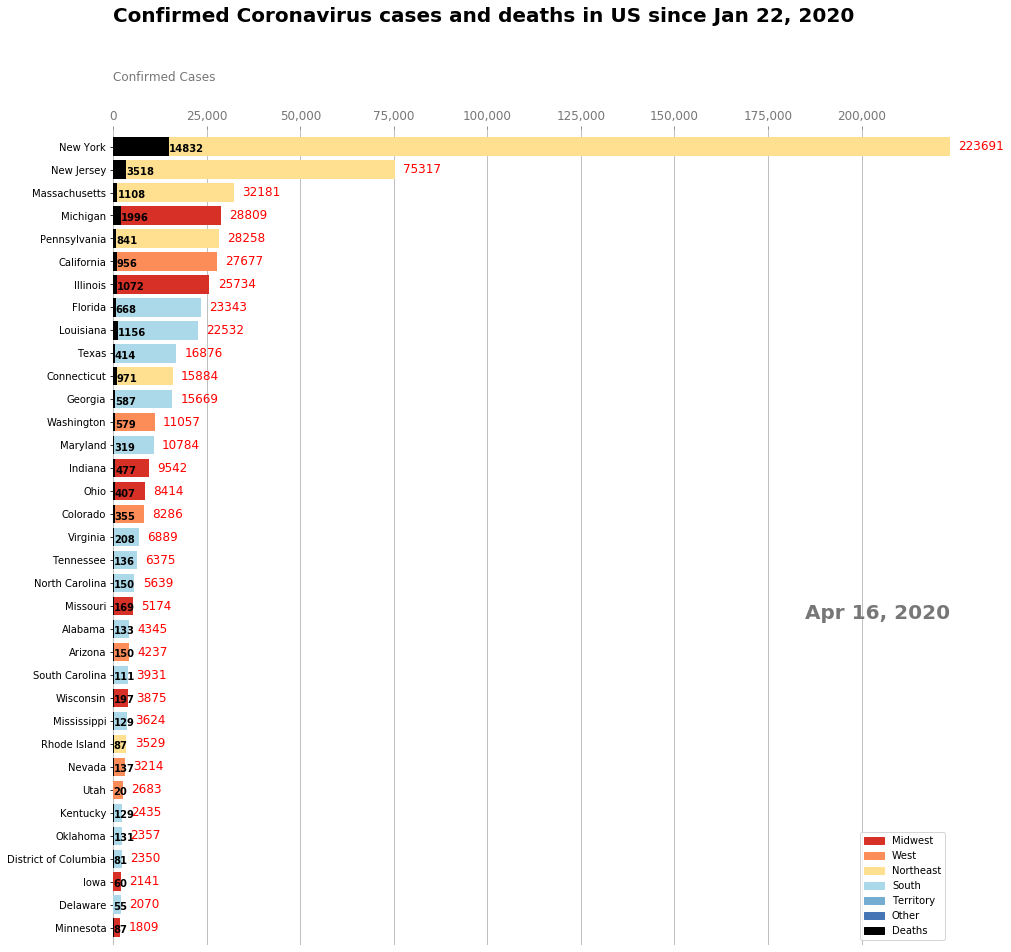

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
draw_stackedbarchart(end)

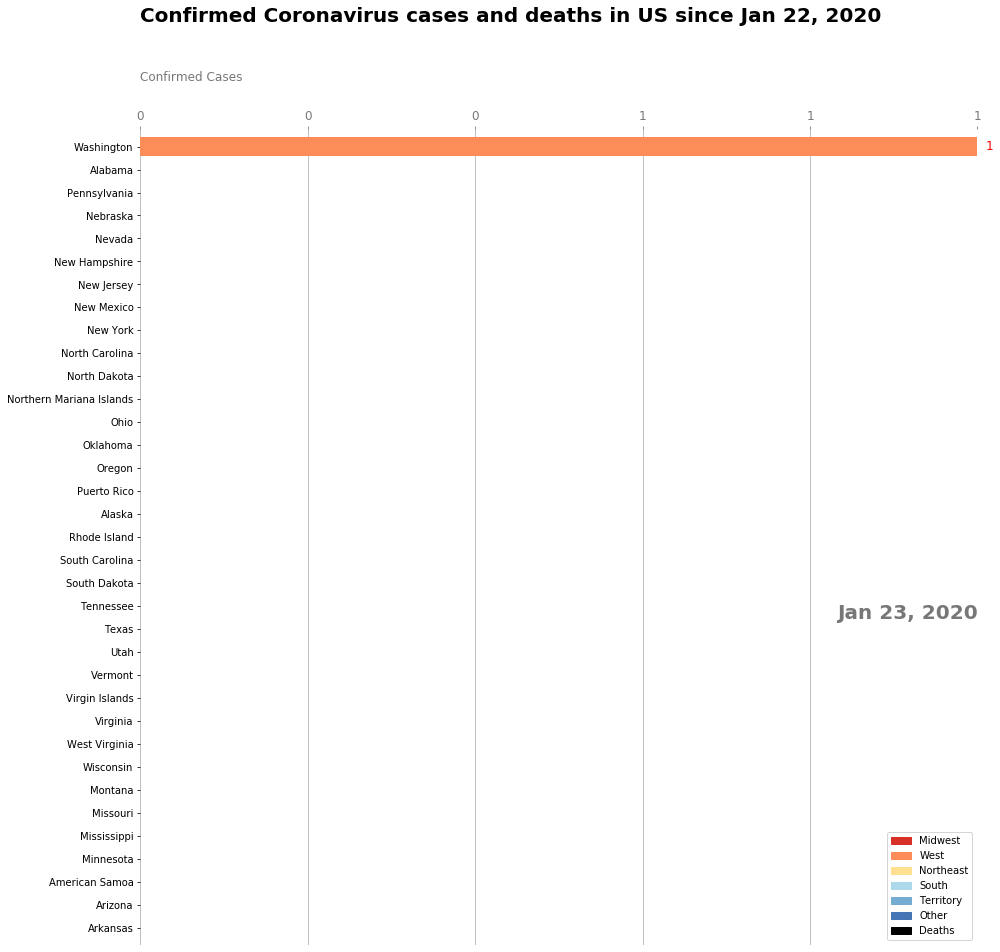

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
#animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start, end), fargs=[death, False])
animator = animation.FuncAnimation(fig, draw_stackedbarchart, frames=pd.date_range(start, end), interval = 300)
#HTML(animator.to_jshtml())

animator.save('covid19_US.mp4', writer='ffmpeg')